# Photovoltaics Interactive Tabletop
## Cristian Sorescu 879091

In [35]:
import numpy as np
import pandas as pd
import tsfresh
import matplotlib.pyplot as plt

# Patterns data
gestures = []

# fist formation gesture
handDetect = pd.read_csv('csv/hand_detected_1.csv', delim_whitespace=False, header=[0, 1], index_col=0)
gestures.append([handDetect, 'Hand Detetction'])
# fist formation gesture
fistForm = pd.read_csv('csv/fist_form_1.csv', delim_whitespace=False, header=[0, 1], index_col=0)
gestures.append([fistForm, 'Fist Formation'])
# clockwise motion gesture
clockwise = pd.read_csv('csv/clockwise_1.csv', delim_whitespace=False, header=[0, 1], index_col=0)
gestures.append([clockwise, 'Clockwise Motion'])
# counterclockwise motion gesture
counterclockwise = pd.read_csv('csv/counterclockwise_1.csv', delim_whitespace=False, header=[0, 1], index_col=0)
gestures.append([counterclockwise, 'Counterclockwise Motion'])
# continuous swipes motion gesture
swipes = pd.read_csv('csv/swipes_1.csv', delim_whitespace=False, header=[0, 1], index_col=0)
gestures.append([swipes, 'Continuous Swipes'])
# singular swipe motion gesture
swipe = pd.read_csv('csv/swipe_1.csv', delim_whitespace=False, header=[0, 1], index_col=0)
gestures.append([swipe, 'Singular Swipe'])
# raise and Lower hand motion
raiseLower = pd.read_csv('csv/raiseLower_1.csv', delim_whitespace=False, header=[0, 1], index_col=0)
gestures.append([raiseLower, 'Raise/Lower Hand Motion'])

In [36]:
# plot the data

#fistForm.shape
#fistForm.head(3)
print(gestures) 

#handDetect['Channel A'].plot(linewidth=1);
#fistForm['Channel A'].plot(linewidth=1);
#clockwise['Channel A'].plot(linewidth=1);

[[Time     Channel A
(s)            (V)
0.000000  0.114750
0.000333  0.097659
0.000667  0.101016
0.001000  0.123295
0.001333  0.132450
...            ...
4.999827  0.095828
5.000160  0.069277
5.000494  0.064089
5.000827  0.043641
5.001160  0.033265

[15004 rows x 1 columns], 'Hand Detetction'], [Time     Channel A
(s)            (V)
0.000000 -0.446486
0.000333 -0.440077
0.000667 -0.447707
0.001000 -0.429395
0.001333 -0.429090
...            ...
4.999827 -0.342723
5.000160 -0.339366
5.000494 -0.347606
5.000827 -0.352489
5.001160 -0.349742

[15004 rows x 1 columns], 'Fist Formation'], [Time     Channel A
(s)            (V)
0.000000 -1.189612
0.000333 -1.173742
0.000667 -1.166417
0.001000 -1.159398
0.001333 -1.153905
...            ...
4.999827 -1.327250
5.000160 -1.327860
5.000494 -1.321757
5.000827 -1.324198
5.001160 -1.338237

[15004 rows x 1 columns], 'Clockwise Motion'], [Time     Channel A
(s)            (V)
0.000000 -0.037843
0.000333 -0.049135
0.000667 -0.043031
0.001000 -0.058290

In [ ]:
# extract features
handDetect.reset_index(inplace=True)
handDetect_features = tsfresh.extract_features(handDetect, column_id='index', n_jobs=4)

#fistForm_features = tsfresh.extract_features(fistForm)

#clockwise_features = tsfresh.extract_features(clockwise)

#counterclockwise_features = tsfresh.extract_features(counterclockwise)

#swipes_features = tsfresh.extract_features(swipes)

#swipe_features = tsfresh.extract_features(swipe)

#raiseLower_features = tsfresh.extract_features(raiseLower)

In [ ]:
from tsfresh.utilities.dataframe_functions import impute

impute(handDetect_features)

In [ ]:
handDetect_features.head()

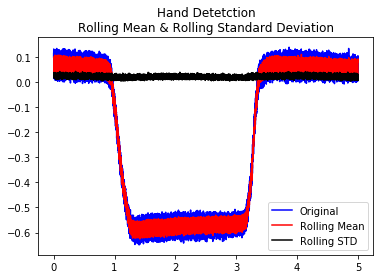

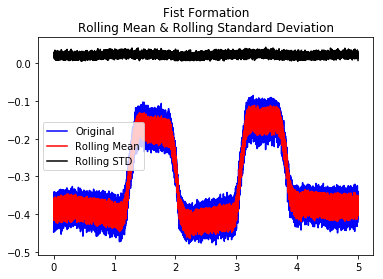

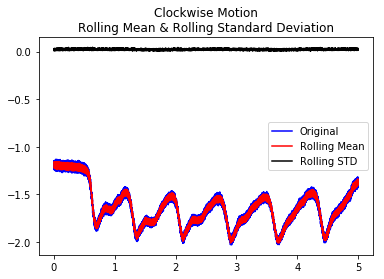

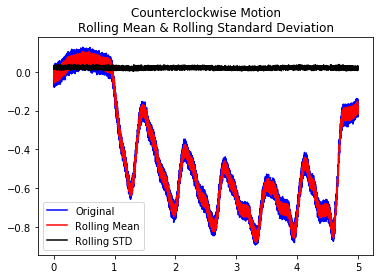

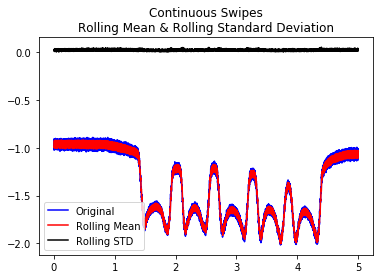

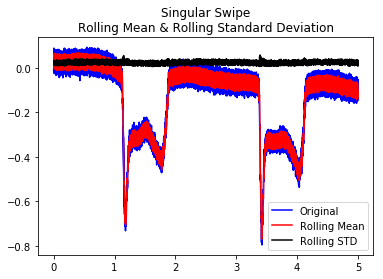

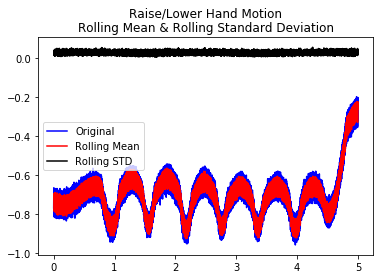

In [42]:
for gesture in gestures:
    gestureDF, title = gesture
    plotTitle = title + '\nRolling Mean & Rolling Standard Deviation'

    rollingMean = gestureDF.rolling(window = 12).mean()
    rollingStd = gestureDF.rolling(window = 12).std()
    plt.plot(gestureDF, color = 'blue', label = 'Original')
    plt.plot(rollingMean, color = 'red', label = 'Rolling Mean')
    plt.plot(rollingStd, color = 'black', label = 'Rolling STD')
    plt.legend(loc = 'best')
    plt.title(plotTitle)
    plt.show()

In [24]:
import mass_ts as mts

ts = handDetect3.to_numpy()
q = handDetect.to_numpy()

print(handDetect3[:,0])

# mass
distances = mts.mass(ts[:,0], q[:,0])

# mass2
distances = mts.mass2(ts[:,0], q[:,0])

# mass3
#distances = mts.mass3(ts[:,0], q[:,0], 256)

# mass2_batch
# start a multi-threaded batch job with all cpu cores and give me the top 5 matches.
# note that batch_size partitions your time series into a subsequence similarity search.
# even for large time series in single threaded mode, this is much more memory efficient than
# MASS2 on its own.
batch_size = 10000
top_matches = 5
n_jobs = 3
indices, distances = mts.mass2_batch(ts[:,0], q[:,0], batch_size, 
    top_matches=top_matches, n_jobs=n_jobs)

# find minimum distance
min_idx = np.argmin(distances)

# find top 4 motif starting indices
k = 4
exclusion_zone = 25
top_motifs = mts.top_k_motifs(distances, k, exclusion_zone)

# find top 4 discord starting indices
k = 4
exclusion_zone = 25
top_discords = mts.top_k_discords(distances, k, exclusion_zone)

TypeError: '(slice(None, None, None), 0)' is an invalid key